In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def prim(G):
    V = [v for v in G.nodes()]
    n = len(V)
    T = []
    S = [V[0]]
    while len(S) < n:
        candidates = []
        for u in S:
            for v, w in G[u].items():
                if not v in S:
                    candidates.append((u, v, w["weight"]))
        (u, v, w) = min(candidates, key=lambda x:x[2])
        S += [v]
        T += [(u, v)]
    return T

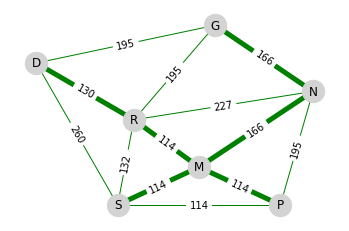

In [5]:
weighted_elist = [
    ("D", "G", 195), ("D", "R", 130), ("D", "S", 260),
    ("G", "R", 195), ("G", "N", 166), ("R", "S", 132),
    ("R", "M", 114), ("R", "N", 227), ("M", "S", 114),
    ("M", "P", 114), ("M", "N", 166), ("N", "P", 195),
    ("P", "S", 114)
    ]

p = {"D": (0, 15), "G": (11, 19), "N": (17, 12), "R": (6, 9), "M": (10, 4), "P": (15, 0), "S": (5, 0)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u, v): G[u][v]["weight"] for (u, v) in G.edges()}

mst = prim(G)
nx.draw_networkx(G, pos=p, node_color="lightgrey", edge_color="green", node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=mst, edge_color="green", width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis("off")
plt.show()